In [74]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
from geopy.geocoders import Nominatim 
import decimal
import folium
import shapely

In [72]:
# Read in our data files
usa = gpd.read_file('C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/MapFiles/USA/cb_2018_us_state_500k.shx')#gpd.datasets.get_path('naturalearth_lowres'))
counties = gpd.read_file('C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/MapFiles/cb_2018_us_county_5m/cb_2018_us_county_5m.shx')
tornadoes = pd.read_csv('C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/Data/tornadodata.csv').iloc[1588:]

In [31]:
# STATEFP for Arkansas is 05, drop the rest!
counties = counties.where(counties['STATEFP'] == '05').dropna()
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
20,05,051,00066855,0500000US05051,05051,Garland,06,1.755290e+09,147383937.0,"POLYGON ((-93.40355 34.60199, -93.40350 34.610..."
50,05,037,00066848,0500000US05037,05037,Cross,06,1.596422e+09,15344835.0,"POLYGON ((-91.03978 35.35426, -91.03964 35.398..."
164,05,045,00066852,0500000US05045,05045,Faulkner,06,1.678155e+09,41787768.0,"POLYGON ((-92.58418 35.02015, -92.56993 35.028..."
231,05,053,00066856,0500000US05053,05053,Grant,06,1.636384e+09,2896901.0,"POLYGON ((-92.67338 34.23935, -92.66871 34.414..."
302,05,097,00069168,0500000US05097,05097,Montgomery,06,2.019824e+09,52913893.0,"POLYGON ((-93.93249 34.55089, -93.93051 34.665..."


In [4]:
# Checking our CRS
# (Coordinate Reference System)
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [63]:
# Converting CSV touchdown data to a Point class so
# it can be interpreted by Geopandas
touchdown_points = [shapely.geometry.Point((float(x),float(y))) for x,y in zip(tornadoes['TouchdownLon'],tornadoes['TouchdownLat'])]
liftoff_points = [shapely.geometry.Point((float(x),float(y))) for x,y in zip(tornadoes['LiftoffLon'],tornadoes['LiftoffLat'])]

# Creating Geodataframes
tornado_td_gdf = gpd.GeoDataFrame(tornadoes, geometry = touchdown_points)
tornado_lo_gdf = gpd.GeoDataFrame(tornadoes, geometry = liftoff_points)

# Displaying a sample of the 
# data
tornado_td_gdf

,Index,Segment,Date,Time,TimeZone,State1,State2,State3,Fujita,Fatalities,...,CropLoss,TouchdownLat,TouchdownLon,LiftoffLat,LiftoffLon,NumberOfStates,StateTor,TorNum,RecordStatus,geometry
1588,20090409.40.168479,State,4/9/2009,18:26:00,3,Oklahoma,NaN,NaN,2,0,...,NaN,34.6192,-94.5619,34.6471,-94.4573,2,NaN,185,Unmodified,POINT (-94.45730 34.64710)
1589,20090409.40.168479,State,4/9/2009,18:34:00,3,Arkansas,NaN,NaN,1,0,...,NaN,34.6471,-94.4573,34.6544,-94.3839,2,NaN,185,Unmodified,POINT (-94.38390 34.65440)
1590,20090409.40.154447,Summary,4/9/2009,19:01:00,3,Oklahoma,Arkansas,-,3,0,...,NaN,34.0100,-94.4800,34.2029,-93.8752,2,NaN,187,Unmodified,POINT (-93.87520 34.20290)
1591,20090409.40.154447,State,4/9/2009,19:01:00,3,Oklahoma,NaN,NaN,2,0,...,NaN,34.0100,-94.4800,34.0102,-94.4754,2,NaN,187,Unmodified,POINT (-94.47540 34.01020)
1592,20090409.40.154447,State,4/9/2009,19:03:00,3,Arkansas,NaN,NaN,3,0,...,NaN,34.0102,-94.4754,34.2029,-93.8752,2,NaN,187,Unmodified,POINT (-93.87520 34.20290)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,20170527.40.615363,Summary,5/27/2017,22:45:00,3,Oklahoma,Arkansas,-,1,0,...,NaN,35.5797,-94.4911,35.6432,-94.3125,2,NaN,615363,Unmodified,POINT (-94.31250 35.64320)
1937,20170527.40.615363,State,5/27/2017,22:45:00,3,Oklahoma,NaN,NaN,1,0,...,NaN,35.5797,-94.4911,35.5862,-94.4641,2,NaN,615363,Unmodified,POINT (-94.46410 35.58620)
1938,20170527.40.615363,State,5/27/2017,22:46:00,3,Arkansas,NaN,NaN,1,0,...,NaN,35.5862,-94.4641,35.6432,-94.3125,2,NaN,615363,Unmodified,POINT (-94.31250 35.64320)
1939,20170703.05.615525,Summary,7/3/2017,5:28:00,3,Arkansas,-,-,1,0,...,NaN,35.8333,-90.7010,35.8337,-90.6995,1,NaN,615525,Unmodified,POINT (-90.69950 35.83370)


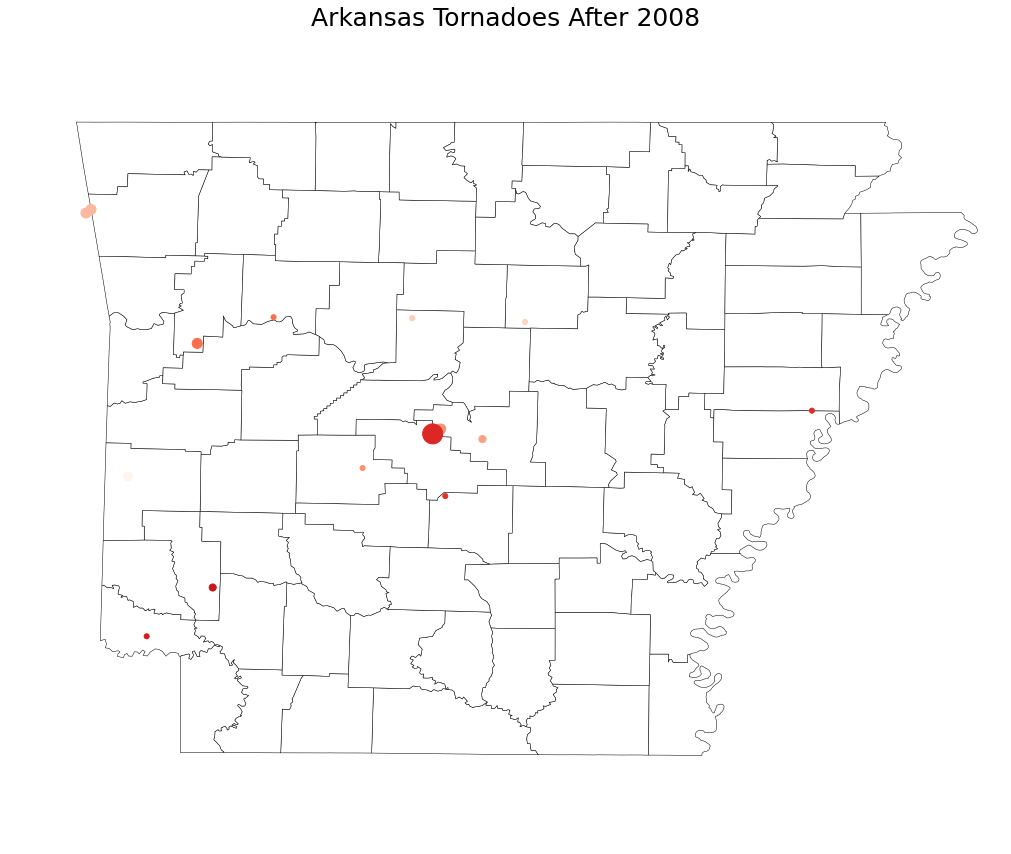

In [66]:
# Drawing Arkansas with county lines
ax = counties.plot(figsize=(20,15), color='white', linewidth=0.5, edgecolor='black')

# Center the map on Arkansas
ax.set_xlim(-95, -89.5)
ax.set_ylim(32.5, 37)

# Add a title and remove the black borders
ax.set_title('Arkansas Tornadoes After 2008', fontdict={'fontsize': '25', 'fontweight':'6'})
ax.axis('off')

# Adding our tornadoes
fig = tornado_td_gdf.plot(ax=ax,cmap='Reds', markersize=(tornado_td_gdf['Fatalities']*25)).get_figure()
#fig = tornado_lo_gdf.plot(ax=ax,cmap='Reds', markersize=(tornado_lo_gdf['Fujita']*25)).get_figure()

# Save the figure to my computer 
# (the .get_figure() method is important for this)
#fig.savefig("C:/Users/William/Documents/_UltraLearning/2020/9.2020/TornadoProject/Figures/ArkansasTornadoesAfter08_fatalities.pdf")

In [9]:
# Accomplished with reference to 
# https://www.youtube.com/watch?v=wsSEKm-rU6U
# https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# https://stackoverflow.com/questions/46477018/zooming-and-saving-only-a-central-part-of-interest-in-a-matplotlib-geopandas-fig
# https://stackoverflow.com/questions/49591616/using-geopandas-to-plot-groups-of-points-on-a-map-produces-a-blank-image
# https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630
# https://gis.stackexchange.com/questions/241612/change-marker-size-in-plot-with-geopandas
# http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/